# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import warnings

In [84]:
data = pd.read_csv('../data/boston_data.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


In [86]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [87]:
# Missing values:

data.isnull().sum()
# data.isnull().sum().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [88]:
# Outliers:

data = data[(np.abs(stats.zscore(data)) < 3.75).all(axis=1)]



# For each column, first it computes the Z-score of each value, 
# relative to the column mean and standard deviation.

# Then is takes the absolute of Z-score because the direction does not matter,
# only if it is below the threshold.

'\nFor each column, first it computes the Z-score of each value, \nrelative to the column mean and standard deviation.\n\nThen is takes the absolute of Z-score because the direction does not matter,\nonly if it is below the threshold.\n\n'

In [89]:
data.shape

(391, 14)

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

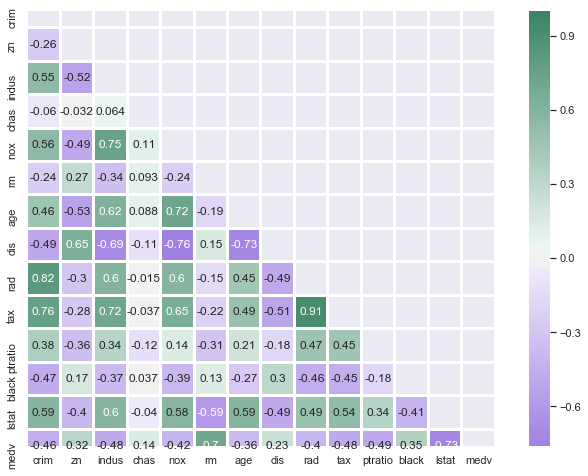

In [96]:
corr = data.corr()

sns.set(rc={'figure.figsize':(12,8)})

mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(275, 150, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=2, annot=True)

In [102]:
px.scatter(data, x='lstat', y='medv', title='Correlation lstat - medv')

In [103]:
px.scatter(data, x='rm', y='medv', title='Correlation rm - medv')

In [104]:
px.scatter(data, x='ptratio', y='medv', title='Correlation ptratio - medv')

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

Only 2 features have a correlation higger than 0.7 with price (medv), 'lstat' and 'rm'. It seems that the status of the population and the number of rooms are the most important features when defining prices.


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [106]:
# Already done

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [107]:
# Already done

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [108]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [109]:
# X-y split:

X = data.drop(columns=['medv'])
y = data['medv']

In [116]:
# train-test split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, 
                                                    random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [129]:
param_grid = {'max_depth': [2, 4, 6, 8, 10]}
CV_rf = GridSearchCV(RandomForestRegressor(n_estimators=100, random_state=42), param_grid, cv=5)
CV_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

Now, plot the score for each tree on the training set and on the testing set.

In [134]:
scoring = pd.DataFrame(CV_rf.cv_results_)

In [135]:
scoring

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.110048,0.006640,0.004858,0.000291,2,{'max_depth': 2},0.467787,0.687486,0.423166,0.853236,0.853112,0.656957,0.183509,5
1,0.117568,0.003479,0.004729,0.000245,4,{'max_depth': 4},0.661876,0.786532,0.510092,0.892780,0.927518,0.755760,0.153876,4
2,0.130257,0.003701,0.005013,0.000347,6,{'max_depth': 6},0.674776,0.839000,0.519725,0.902198,0.939425,0.775025,0.156538,3
3,0.142769,0.003404,0.005003,0.000182,8,{'max_depth': 8},0.678955,0.851833,0.526351,0.906952,0.943540,0.781526,0.156562,1
4,0.152175,0.004877,0.005336,0.000407,10,{'max_depth': 10},0.681918,0.847776,0.524006,0.907977,0.943518,0.781039,0.156753,2


In [136]:
scoring = scoring[['params', 'mean_test_score']]
scoring

,params,mean_test_score
0,{'max_depth': 2},0.656957
1,{'max_depth': 4},0.755760
2,{'max_depth': 6},0.775025
3,{'max_depth': 8},0.781526
4,{'max_depth': 10},0.781039


What do these results tell you about the effect of the depth of the trees on the performance of the model?

At greater depth, less improvement due to overfitting. 

In [156]:
# Best parameter:

CV_rf.best_params_

{'max_depth': 8}

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [158]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=8)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [159]:
y_pred = rfr.predict(X_test)
performance_metric(y_test, y_pred)

0.8185232381058627

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here